## initial code for our Hand Gesture Recognition

In [1]:
# ML models imports
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

# destribution models imports
from scipy.stats import randint, uniform

# Data manipulation imports
import numpy as np
import pandas as pd
import tqdm as tqdm

# visualisation models imports
import matplotlib.pyplot as plt

# image processing imports
import skimage.io as io
import cv2
from skimage.transform import resize

# dealing with files
import os

# visual dataset (to test randomized gridsearch not needed for now)
from sklearn.datasets import make_hastie_10_2  # to test our models


from utils import prepareData, LoadData, FeatureExtraction, preprocess

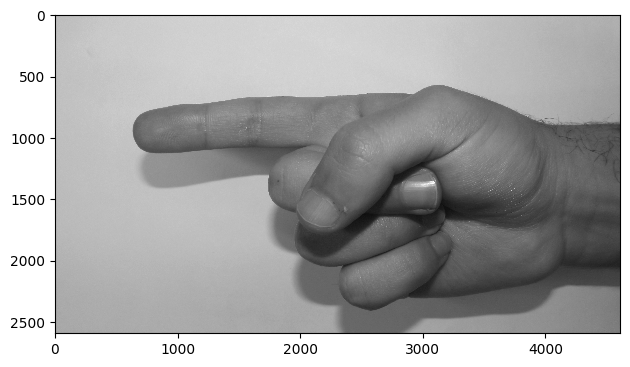

In [12]:
io.imshow(image)

In [32]:
image.shape

(2592, 4608)

In [2]:
def FeatureExtraction(image):
    # this written code is an initial code for extracting features

    '''

        TODO: Feature Extraction code should be implemented here.  

    '''
    
    resized_image = resize(image,(500,500))   # downscaing from approx 2500x4000 to 500x500
    
    # Extract the hog features
    # block_norm uses L2 norm with hysterisis for reducing effect of illuminacity
    # transform_sqrt for applying gamma correction
    hog_features = hog(resized_image, block_norm='L2-Hys', feature_vector=True, transform_sqrt=True)

    # image = np.array(resized).flatten() # flatten our image to be used as input vector to our model

    return hog_features

In [18]:
image = io.imread("1_men (2).JPG",as_gray=True)
f = FeatureExtraction(image)
print(f.shape)

(291600,)


# sift descriptors

In [27]:

# Load two images
img1 = cv2.imread('1_men (1).JPG')
img2 = cv2.imread('1_men (2).JPG')

# Create a SIFT object
sift = cv2.xfeatures2d.SIFT_create()

# Detect keypoints and compute descriptors for both images
kp1, des1 = sift.detectAndCompute(img2, None)

print(len(kp1))


572


In [41]:

# Load the hand image
hand_img = cv2.imread('Skin Mask_2.jpg')

# Convert to grayscale
gray = cv2.cvtColor(hand_img, cv2.COLOR_BGR2GRAY)

# Threshold the image
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Find contours in the thresholded image
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Find the contour with maximum area (the hand contour)
hand_contour = max(contours, key=cv2.contourArea)

# Find the convex hull of the hand contour
hull = cv2.convexHull(hand_contour)

# Draw the hand contour and convex hull on the original image
cv2.drawContours(hand_img, [hand_contour], 0, (0, 255, 0), 2)
cv2.drawContours(hand_img, [hull], 0, (0, 0, 255), 2)

# Display the result
cv2.imwrite('Hand Gesture_after segmented.jpg', hand_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [4]:
img = cv2.imread('1_men (2).JPG')
lower_rgb=np.array([0, 0, 0],dtype="uint8")
upper_rgb=np.array([230, 230, 230],dtype="uint8")
skin_region=cv2.inRange(img,lower_rgb,upper_rgb)
cv2.imwrite("segmented_2.jpg",skin_region)

True

In [42]:
import cv2
import numpy as np

# Load image
img = cv2.imread('1_men (2).JPG')

# Convert to YCrCb color space
img_ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCR_CB)

# Extract Cr and Cb channels
cr, cb, _ = cv2.split(img_ycrcb)

# Apply threshold on Cr and Cb channels
_, cr_thresh = cv2.threshold(cr, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
_, cb_thresh = cv2.threshold(cb, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Combine the thresholded channels using bitwise AND
skin_mask = cv2.bitwise_and(cr_thresh, cb_thresh)

# Display the skin mask
cv2.imwrite('Skin Mask_2.jpg', skin_mask)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [11]:
print(len(hull))

24


In [2]:
Features, labels = LoadData()
 


In [6]:
import tensorflow as tf

In [8]:
print(tf.config.list_physical_devices('GPU'))

SyntaxError: incomplete input (3956129405.py, line 1)

In [62]:
#! pip install imageio[pyav] (in case of having error while loading some of images try this one)

* # Selecting the best model

- ### Define hyperparameter grids for each model

In [3]:
param_distributions = {
    'RandomForestClassifier': {
        'n_estimators': randint(50, 500),
        'max_depth': randint(2, 20),
        'min_samples_split': randint(2, 10),
        'min_samples_leaf': randint(1, 5),
        'max_features': ['sqrt', 'log2']
    },
    'GradientBoostingClassifier': {
        'learning_rate': uniform(0.01, 0.2),
        'n_estimators': randint(50, 500),
        'max_depth': randint(2, 20),
        'min_samples_split': randint(2, 10),
        'min_samples_leaf': randint(1, 5),
        'max_features': ['sqrt', 'log2']
    },
    'SVC': {
        'C': uniform(0.01, 10),
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'degree': randint(2, 5),
        'gamma': ['scale', 'auto'] + list(np.arange(0.1, 1, 0.1))
    },
    'LogisticRegression': {
        'C': uniform(0.01, 10),
        'penalty': ['l1', 'l2', 'elasticnet', 'none'],
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        'max_iter': randint(50, 500)
    },
    'DecisionTreeClassifier': {
        'criterion': ['gini', 'entropy'],
        'splitter': ['best', 'random'],
        'max_depth': randint(2, 20),
        'min_samples_split': randint(2, 10),
        'min_samples_leaf': randint(1, 5),
        'max_features': ['sqrt', 'log2']
    },
    'KNeighborsClassifier': {
        'n_neighbors': randint(3, 30),
        'weights': ['uniform', 'distance'],
        'algorithm': ['ball_tree', 'kd_tree', 'brute'],
        'leaf_size': randint(10, 100)
    },
    'GaussianNB': {
        'var_smoothing': uniform(1e-09, 1e-07)
    },
    'MLPClassifier': {
        'hidden_layer_sizes': [(50, 50), (100,), (100, 50)],
        'activation': ['identity', 'logistic', 'tanh', 'relu'],
        'solver': ['lbfgs', 'sgd', 'adam'],
        'alpha': uniform(0.0001, 0.01),
        'max_iter': randint(100, 1000)
    }
}

- ### Create a list of models to train (as example)

In [4]:
models = [
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    SVC(),
    LogisticRegression(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    GaussianNB(),
    MLPClassifier()
]

- ### Loop over the models and fit  

In [5]:
# load our dummy data to test the randomizedSearche function
x,y = Features,labels
df = pd.DataFrame(x)
df['Y'] = y

train, test = train_test_split(df, test_size=0.2) # this function shuffles the data points, and splits the data into
                                                  # 80% training set and 20% test set (indicated by test_size=0.2)
X_train, Y_train = train.iloc[:, :-1], train.iloc[:, -1]
X_test, Y_test = test.iloc[:, :-1], test.iloc[:, -1]
# Fit a simple decision tree first

In [6]:
for i, model in enumerate(models):
    print(f'Training Model {i+1}/{len(models)}: {str(model)[:-2]}')
    # Define randomized grid search
    random_search = RandomizedSearchCV(model, param_distributions[str(model)[:-2]], n_iter=10,cv=5, n_jobs=-1) # n_jobs means number of jobs to run in parallel. None means 1,
                                                                                                                # -1 means using all processors 😈.
    # Fit the randomized grid search to the data
    random_search.fit(X_train, Y_train)
    print(f'Best score: {random_search.best_score_:.3f}')
    print(f'Best parameters: {random_search.best_params_}\n')

Training Model 1/8: RandomForestClassifier
Best score: 0.356
Best parameters: {'max_depth': 19, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 337}

Training Model 2/8: GradientBoostingClassifier
Best score: 0.362
Best parameters: {'learning_rate': 0.08814234709569363, 'max_depth': 11, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 210}

Training Model 3/8: SVC
Best score: 0.273
Best parameters: {'C': 6.2918311942356535, 'degree': 3, 'gamma': 0.6, 'kernel': 'linear'}

Training Model 4/8: LogisticRegression


: 